## 3 digits - Merging only year wise

### Waves 4,5,6

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/data_clean_w456.csv"
)
indexes = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/work_quality_indexes_year.csv"
)

In [3]:
def convert_to_3_digits(number):
    return int(str(number)[:-1]) if number >= 1000 else number


df["isco"] = df["isco"].apply(lambda x: convert_to_3_digits(x))
indexes["isco"] = indexes["isco"].apply(lambda x: convert_to_3_digits(x))

In [4]:
df = df.merge(indexes, on=["year", "isco"], how="inner")

In [5]:
df

,mergeid,wave,year,age,nb_children,partnerinhh,job_status,eurod,eurodcat,country,...,jqi_working_time_quality,jqi_monthly_earnings_weighted,jqi_skills_discretion_weighted,jqi_social_environment_weighted,jqi_physical_environment_weighted,jqi_intensity_weighted,jqi_prospects_weighted,jqi_working_time_quality_weighted,jqi_sum,jqi_sum_weighted
0,AT-009262-01,4,2011,56.0,1.0,1,Self-employed,1.0,0,Austria,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,418.133189,226.690947
1,AT-329641-01,4,2011,55.0,2.0,0,Employee,0.0,0,Austria,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,418.133189,226.690947
2,Bf-339845-02,4,2011,50.0,2.0,1,Employee,1.0,0,Belgium,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,418.133189,226.690947
3,CZ-564991-01,4,2011,58.0,2.0,0,Self-employed,2.0,0,Czech Republic,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,418.133189,226.690947
4,CZ-715731-02,4,2011,54.0,4.0,0,Employee,2.0,0,Czech Republic,...,76.205645,413.279438,24.372010,37.764297,51.406949,43.653205,28.364955,42.481878,418.133189,226.690947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42070,DE-759103-02,6,2015,56.0,2.0,1,Public sector employee,6.0,1,Germany,...,72.075000,1996.395646,65.640037,48.557938,78.059213,55.676320,82.680343,71.439368,420.018903,208.279058
42071,DE-832828-01,6,2015,54.0,5.0,1,Public sector employee,1.0,0,Germany,...,86.756944,1188.485159,46.655455,66.435423,68.964447,37.735502,58.011061,68.952177,421.893216,315.930394
42072,DK-946710-01,6,2015,56.0,3.0,1,Public sector employee,0.0,0,Denmark,...,86.756944,1188.485159,46.655455,66.435423,68.964447,37.735502,58.011061,68.952177,421.893216,315.930394
42073,EE-170403-01,6,2015,54.0,1.0,0,Private sector employee,0.0,0,Estonia,...,86.756944,1188.485159,46.655455,66.435423,68.964447,37.735502,58.011061,68.952177,421.893216,315.930394


In [6]:
df.mergeid.nunique()

6772

In [7]:
df.groupby("country").mergeid.nunique()

country
Austria           390
Belgium           834
Czech Republic    533
Denmark           525
Estonia           805
France            451
Germany           845
Italy             647
Slovenia          383
Spain             788
Switzerland       571
Name: mergeid, dtype: int64

In [8]:
df.groupby("year").mergeid.nunique()

year
2011    3625
2013    4860
2015    4387
Name: mergeid, dtype: int64

In [9]:
df.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w456_year.csv",
    index=False,
)

### Some descriptive stats

In [10]:
round(df[["age", "gender", "nb_children", "yrseducation"]].describe(), 2)

,age,gender,nb_children,yrseducation
count,42075.00,42075.0,42075.00,42075.00
mean,56.40,0.5,1.77,12.67
std,3.12,0.5,1.26,4.54
min,50.00,0.0,0.00,0.00
25%,54.00,0.0,1.00,11.00
50%,56.00,1.0,2.00,13.00
75%,59.00,1.0,2.00,16.00
max,65.00,1.0,11.00,39.00


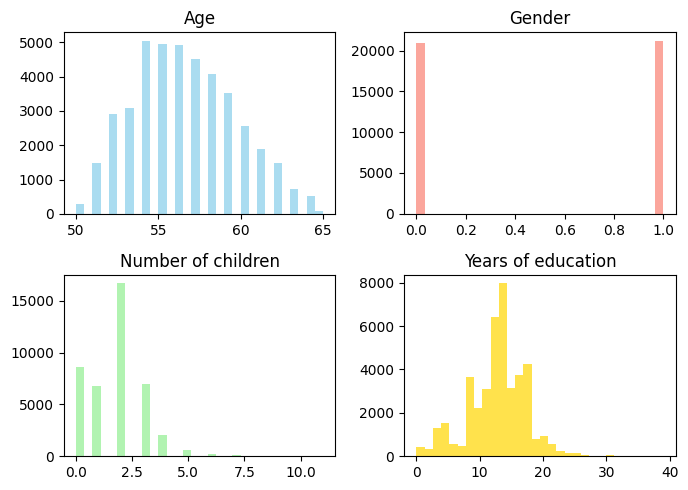

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["age"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Age")

axs[0, 1].hist(df["gender"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Gender")

axs[1, 0].hist(df["nb_children"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Number of children")

axs[1, 1].hist(df["yrseducation"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Years of education")

plt.tight_layout()

plt.show()

In [12]:
round(df["job_status"].value_counts(normalize=True), 2)

job_status
Private sector employee    0.39
Public sector employee     0.21
Employee                   0.21
Self-employed              0.15
Civil servant              0.04
Name: proportion, dtype: float64

In [13]:
round(
    df[
        ["yrscontribution", "retirement_age", "work_horizon", "work_horizon_change"]
    ].describe(),
    2,
)

,yrscontribution,retirement_age,work_horizon,work_horizon_change
count,42075.00,42075.00,42075.00,42075.00
mean,35.98,63.12,6.72,0.25
std,6.03,2.13,3.40,0.60
min,6.00,57.00,0.08,0.00
25%,33.00,61.67,4.00,0.00
50%,37.00,63.50,7.00,0.00
75%,40.00,65.00,9.00,0.08
max,55.00,68.00,17.00,4.00


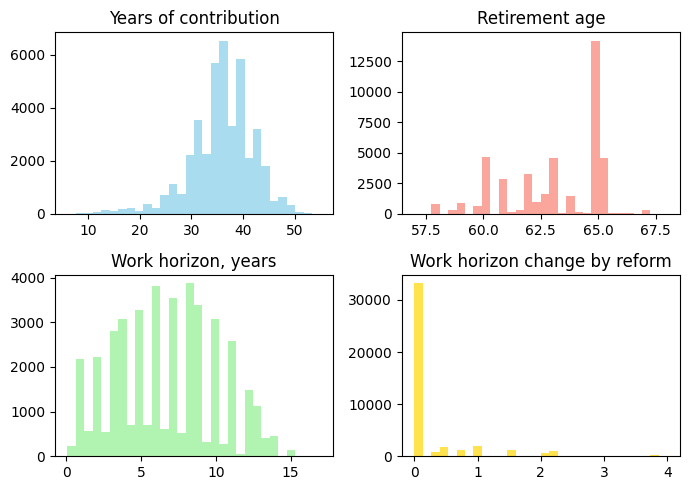

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["yrscontribution"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Years of contribution")

axs[0, 1].hist(df["retirement_age"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Retirement age")

axs[1, 0].hist(df["work_horizon"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Work horizon, years")

axs[1, 1].hist(df["work_horizon_change"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Work horizon change by reform")

plt.tight_layout()

plt.show()

In [15]:
round(df["eurodcat"].value_counts(normalize=True), 2)

eurodcat
0    0.82
1    0.18
Name: proportion, dtype: float64

In [16]:
df["eurod"].value_counts()

eurod
0.0     11337
1.0     10374
2.0      7583
3.0      5130
4.0      3450
5.0      1990
6.0      1134
7.0       621
8.0       245
9.0       148
10.0       48
11.0       11
12.0        4
Name: count, dtype: int64

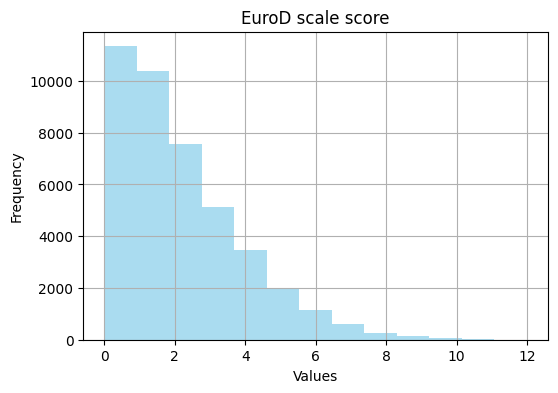

In [17]:
plt.figure(figsize=(6, 4))
plt.hist(df["eurod"], bins=13, color="skyblue", alpha=0.7)
plt.title("EuroD scale score")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [18]:
round(
    df[
        [
            "jqi_monthly_earnings",
            "jqi_skills_discretion",
            "jqi_social_environment",
            "jqi_physical_environment",
            "jqi_intensity",
            "jqi_prospects",
            "jqi_working_time_quality",
        ]
    ].describe(),
    2,
)

,jqi_monthly_earnings,jqi_skills_discretion,jqi_social_environment,jqi_physical_environment,jqi_intensity,jqi_prospects,jqi_working_time_quality
count,42075.00,42075.00,42075.00,42075.00,42075.00,42075.00,42075.00
mean,1599.82,59.79,80.79,84.18,51.03,60.13,86.77
std,488.93,13.59,4.69,8.99,6.97,9.09,9.22
min,419.13,5.41,40.91,42.82,20.16,12.50,36.44
25%,1272.93,49.25,78.47,78.21,46.74,54.33,82.61
50%,1537.07,59.84,81.03,87.17,50.53,60.89,88.95
75%,1836.61,70.84,83.32,91.43,55.09,66.08,93.28
max,6766.63,89.61,100.00,98.90,76.74,87.50,100.00


### Waves 4,5,6 common individuals

In [19]:
df.mergeid.nunique()

6772

In [20]:
unique_mergeid_w4 = set(df[df.wave == 4]["mergeid"].unique())
unique_mergeid_w5 = set(df[df.wave == 5]["mergeid"].unique())
unique_mergeid_w6 = set(df[df.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w5).intersection(
    unique_mergeid_w6
)
len(intersection_ids)

1730

In [21]:
w456_common = df[df["mergeid"].isin(intersection_ids)].reset_index(drop=True)

isco = w456_common["isco"].value_counts().to_frame().reset_index()
isco = isco[isco["count"] >= 10]
w456_common = w456_common[w456_common["isco"].isin(isco["isco"].unique())].reset_index(
    drop=True
)

In [22]:
w456_common.groupby("country").mergeid.nunique()

country
Austria           130
Belgium           240
Czech Republic    129
Denmark           154
Estonia           283
France            163
Germany            27
Italy             112
Slovenia           80
Spain             110
Switzerland       302
Name: mergeid, dtype: int64

In [23]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [24]:
w456_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w456_year_common.csv",
    index=False,
)

### Waves 4 and 6

In [25]:
result = (
    df[df["year"].isin([2013, 2015])]
    .groupby("mergeid")["work_horizon_change"]
    .sum()
    .reset_index()
)
result["year"] = 2015

df = df.drop(columns="work_horizon_change")
df = df.merge(result, on=["mergeid", "year"], how="left")

df["work_horizon_change"] = df["work_horizon_change"].fillna(0)

In [26]:
w46 = df[(df.wave == 4) | (df.wave == 6)].reset_index(drop=True)

In [27]:
w46.mergeid.nunique()

6007

In [28]:
w46.groupby("country").mergeid.nunique()

country
Austria           373
Belgium           750
Czech Republic    464
Denmark           470
Estonia           763
France            432
Germany           662
Italy             560
Slovenia          355
Spain             618
Switzerland       560
Name: mergeid, dtype: int64

In [29]:
w46.groupby("wave").mergeid.nunique()

wave
4    3625
6    4387
Name: mergeid, dtype: int64

In [30]:
w46.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w46_year.csv",
    index=False,
)

### Waves 4 and 6 common individuals

In [31]:
unique_mergeid_w4 = set(w46[w46.wave == 4]["mergeid"].unique())
unique_mergeid_w6 = set(w46[w46.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w6)
len(intersection_ids)

2005

In [32]:
w46_common = w46[w46["mergeid"].isin(intersection_ids)].reset_index(drop=True)

In [33]:
w46_common.groupby("country").mergeid.nunique()

country
Austria           153
Belgium           285
Czech Republic    160
Denmark           165
Estonia           325
France            185
Germany            30
Italy             139
Slovenia           98
Spain             128
Switzerland       337
Name: mergeid, dtype: int64

In [34]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [35]:
w46_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w46_year_common.csv",
    index=False,
)